In [ ]:
!wget https://raw.githubusercontent.com/mananparasher/PML-Machine-Learning-Datasets/master/titanic_dataset.csv

--2022-02-03 05:42:59--  https://raw.githubusercontent.com/mananparasher/PML-Machine-Learning-Datasets/master/titanic_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_dataset.csv’

titanic_dataset.csv 100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2022-02-03 05:42:59 (4.87 MB/s) - ‘titanic_dataset.csv’ saved [61194/61194]



In [ ]:
!ls

sample_data  titanic_dataset.csv


In [ ]:
# https://pandas.pydata.org/docs/

import pandas as pd
#names = ['passenger id', 'Ticket class', 'Sex', 'Age', 'siblings/spouses', 'parents/children', 'Ticket number','Passenger fare','Cabin number','Port of Embarkation']
data_frame = pd.read_csv('titanic_dataset.csv')
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_frame.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f066c025250>,
      dtype=object)

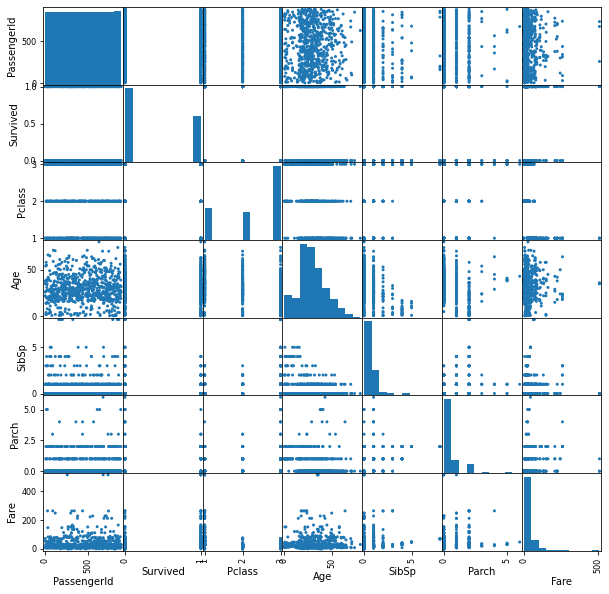

In [ ]:
pd.plotting.scatter_matrix(data_frame, alpha=1,figsize=(10,10))


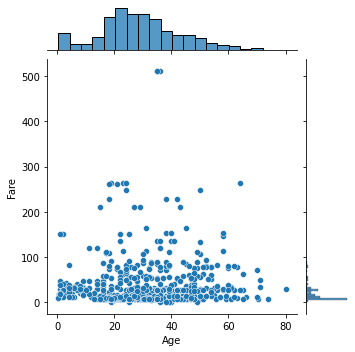

In [ ]:
import seaborn as sns
sns.jointplot(x='Age', y='Fare', data=data_frame, height=5)

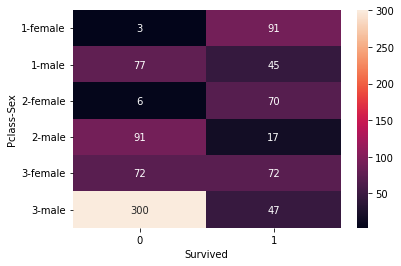

In [ ]:
group = data_frame.groupby(['Pclass', 'Sex','Survived'])
pclass_survived = group.size().unstack()
 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

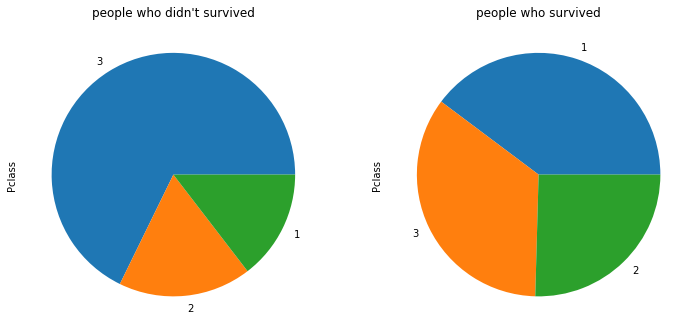

In [ ]:
import matplotlib.pyplot as plt


not_survived_class = data_frame['Pclass'][data_frame['Survived']==0]
survived_class = data_frame['Pclass'][data_frame['Survived']==1]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
not_survived_class.value_counts().plot(kind='pie', title='people who didn\'t survived')

plt.subplot(1,2,2)
survived_class.value_counts().plot(kind='pie', title='people who survived')

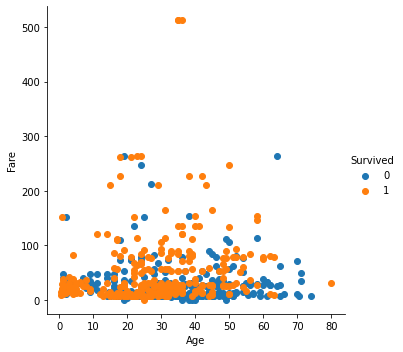

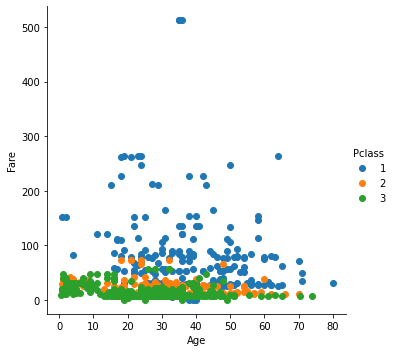

In [ ]:
import matplotlib.pyplot as plt

sns.FacetGrid(data_frame, hue='Survived', height=5).map(plt.scatter,'Age', 'Fare').add_legend()
sns.FacetGrid(data_frame, hue='Pclass', height=5).map(plt.scatter,'Age', 'Fare').add_legend()

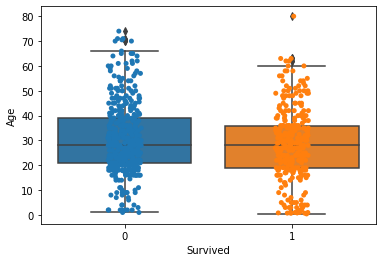

In [ ]:
ax = sns.boxplot(x='Survived', y='Age', data=data_frame)
ax = sns.stripplot(x='Survived', y='Age', data=data_frame, jitter=True)

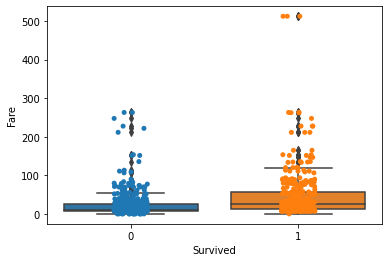

In [ ]:
ax = sns.boxplot(x='Survived', y='Fare', data=data_frame)
ax = sns.stripplot(x='Survived', y='Fare', data=data_frame, jitter=True)

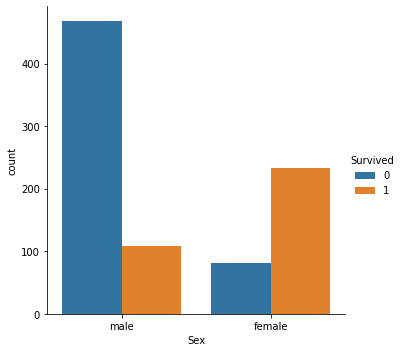

In [ ]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data_frame)

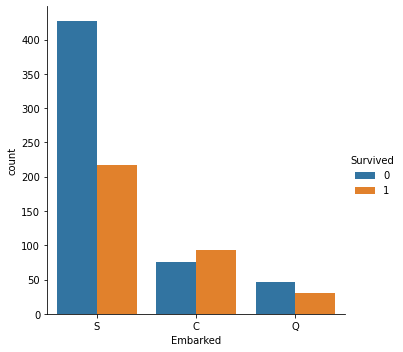

In [ ]:
sns.catplot(x ="Embarked", hue ="Survived", kind ="count", data = data_frame)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


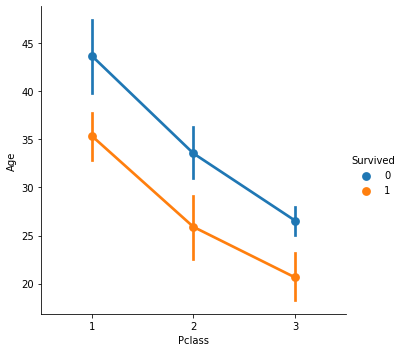

In [ ]:
sns.factorplot(x ='Pclass', y ='Age',hue= 'Survived', data = data_frame)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


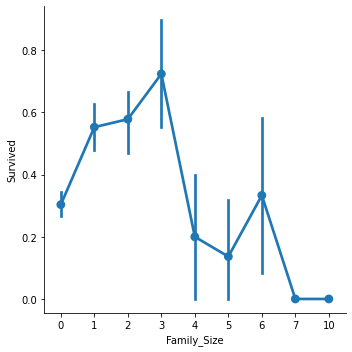

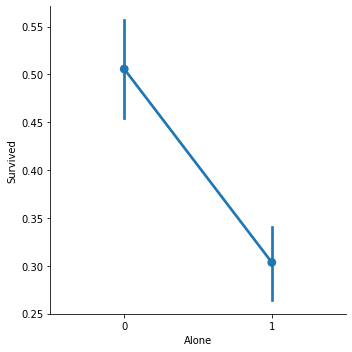

In [ ]:
data_frame['Family_Size'] = 0
data_frame['Family_Size'] = data_frame['Parch']+data_frame['SibSp']

data_frame['Alone'] = 0
data_frame.loc[data_frame.Family_Size == 0, 'Alone'] = 1
 
sns.factorplot(x ='Family_Size', y ='Survived', data = data_frame)

sns.factorplot(x ='Alone', y ='Survived', data = data_frame)

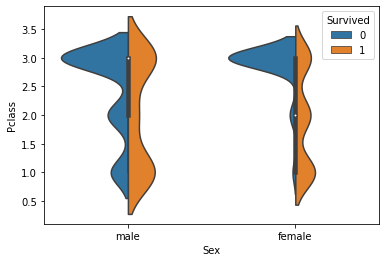

In [ ]:
sns.violinplot(x ="Sex", y ="Pclass", hue ="Survived",
data = data_frame, split = True)


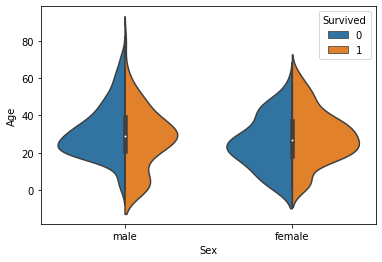

In [ ]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = data_frame, split = True)

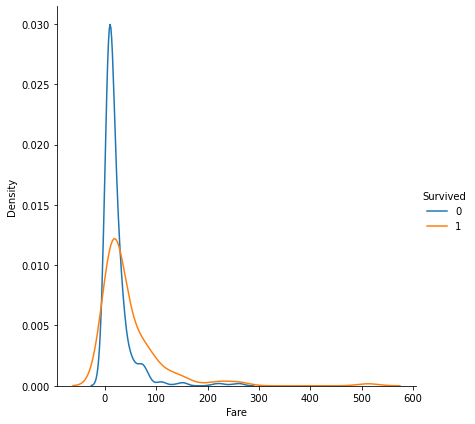

In [ ]:
sns.FacetGrid(data_frame, hue='Survived', height=6) \
   .map(sns.kdeplot, 'Fare') \
   .add_legend()

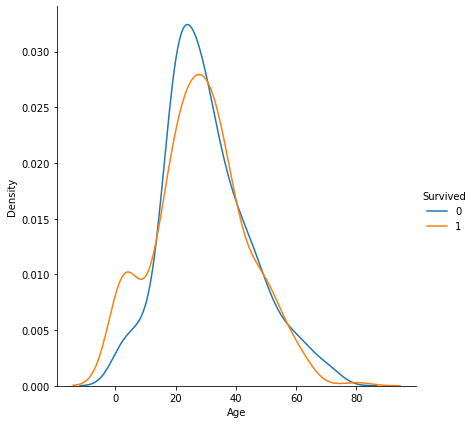

In [ ]:
sns.FacetGrid(data_frame, hue='Survived', height=6) \
   .map(sns.kdeplot, 'Age') \
   .add_legend()

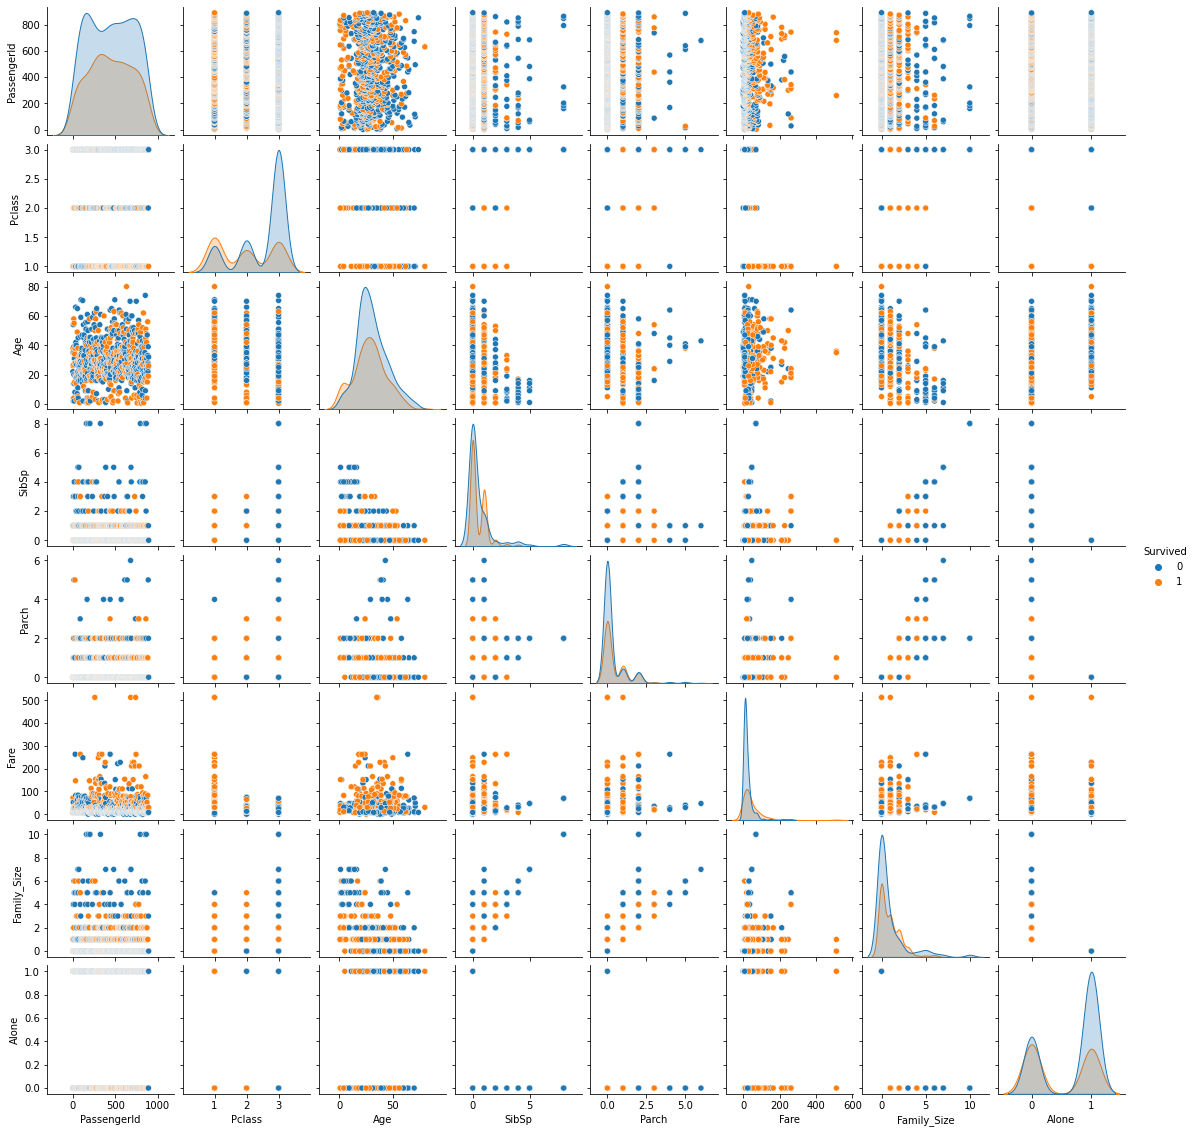

In [ ]:
sns.pairplot(data_frame, hue='Survived', height=2)